# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [12]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [49]:
def f(x):
    return (x**2)*(numpy.sin(x));



True


Ensure your function works with numpy arrays:

In [14]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [50]:
def g(x):
    return 2*x*numpy.sin(x) - (x**2 - 2)*numpy.cos(x) - 2 ;





Check your solution with the same numpy array:

In [16]:
assert g(0) == 0.

In [17]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [51]:
def integrate_analytic(xmin, xmax):
    return ( g(xmax) - g(xmin) );



Check your analytic function:

In [19]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [52]:
def integrate_numeric(xmin, xmax, N):
    dx = (xmin - xmax)/N
    integral = 0
    for i in range (0,N):
        integral += (dx/6)*(f(dx*i)+4*f(dx*(i+(1/2)))+f(dx*(i+1)))
    return integral ;
    
    
    
#CHECK
r = numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)
t = numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)
print(r)
print(t)

True
True


Make sure you have implemented Simpson's rule correctly:

In [21]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [22]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


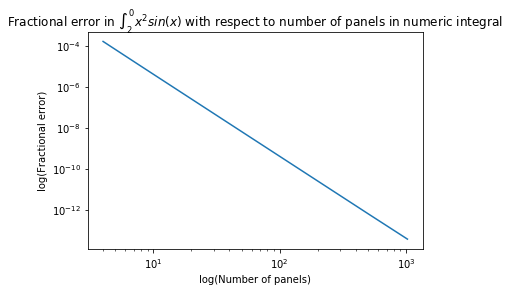

In [47]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

num_int = []
for i in panel_counts:
    num_int.append(integrate_numeric(x0, x1, i))

frac_err = []
for i in num_int:
    frac_err.append(abs(result_analytic - i)/result_analytic)
                               
plt.plot(panel_counts, frac_err)
plt.xscale("log")
plt.yscale("log")
plt.ylabel("log(Fractional error)")
plt.xlabel("log(Number of panels)")
plt.title("Fractional error in $\int_{2}^{0} x^{2}sin(x)$ with respect to number of panels in numeric integral")
plt.show()                             


What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

In the range plotted ($4 \leqslant $ Number of panels $ \leqslant 1024$) increacing the number of panels decreaces the fractional error. We can quatify this and say that the error is proportional to $N^{-4}$, where $N$ is the number of panels. This relation only holds to aproximatly 1100 panels however, after which the error first decreaces at a faster rate for increacing $N$, then fluctuates heavily. This is due to the computer suffering from numerical round off issues as it rounds the last digits of the incredibly small numbers in order to store them, thus effecting the error calculations.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The trapezium rule has greater errors associated with it than Simpson's rule, since it only matches to 2 points in each panel compared to the 3 used in Simpson's rule. The error therefore scales with $N^{-2}$ for an increacing number of panels. Much like Simpson's rule the trapezium rule also suffers from numerical round off issues, but due to the slower reduction of errors these only start to appear around $N = 10^{6}$.